# Pengumpulan & Pembersihan Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/KlasifikasiUTS.csv')

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# Cek missing value
print(df.isnull().sum())

# Tidak ada missing value

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [20]:
# Cek duplikasi
print(df.duplicated().sum())

# Hapus duplikasi (jika ada)
df.drop_duplicates(inplace=True)

# Cek kembali duplikasi
print(df.duplicated().sum())


0
0


# Feature Selection

In [21]:

# Pisahkan fitur dan target
X = df.drop(['Class'], axis=1)  # Kolom target adalah 'Class'
y = df['Class']  # Kolom target adalah 'Class'

# Menghapus fitur yang konstan (variasi = 0)
X = X.loc[:, (X.var() != 0)]

# Menghapus fitur yang berkorelasi tinggi (> 0.8)
cor_matrix = X.corr()

# Menghapus salah satu kolom dari pasangan yang memiliki korelasi > 0.8
to_drop = set()
for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if abs(cor_matrix.iloc[i, j]) > 0.8:  # Korelasi lebih besar dari 0.8
            colname = cor_matrix.columns[i]
            to_drop.add(colname)

X = X.drop(columns=to_drop)

# Menampilkan fitur yang tersisa
print("Fitur yang tersisa setelah seleksi:")
print(X.columns)

# Jika masih ada fitur yang tersisa, lakukan Mutual Information
if X.shape[1] > 0:
    from sklearn.feature_selection import mutual_info_classif

    mi = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi, index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    # Pilih 10 fitur terbaik berdasarkan mutual information
    selected_features = mi_scores.index[:10]
    X_selected = X[selected_features]

    print("Fitur yang dipilih berdasarkan Mutual Information:")
    print(X_selected.columns)
else:
    print("Tidak ada fitur yang tersisa setelah seleksi.")

Fitur yang tersisa setelah seleksi:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Fitur yang dipilih berdasarkan Mutual Information:
Index(['V17', 'V14', 'V12', 'V10', 'V11', 'V16', 'V4', 'V3', 'V18', 'V9'], dtype='object')


# Feature Engineering

In [22]:
# Scaling Fitur Numerik
# Standarisasi data fitur (Scaling ke rentang yang sama)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)  # Menggunakan X_selected yang sudah diseleksi fitur

# Membagi Data menjadi Train dan Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data train dan test
print(f"Data Train: {X_train.shape}")
print(f"Data Test: {X_test.shape}")

Data Train: (226980, 10)
Data Test: (56746, 10)


# Modeling

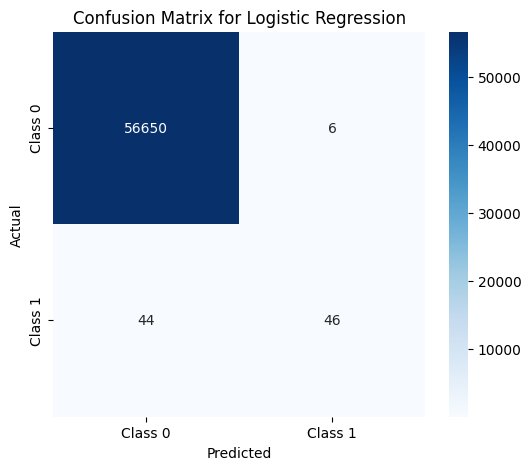

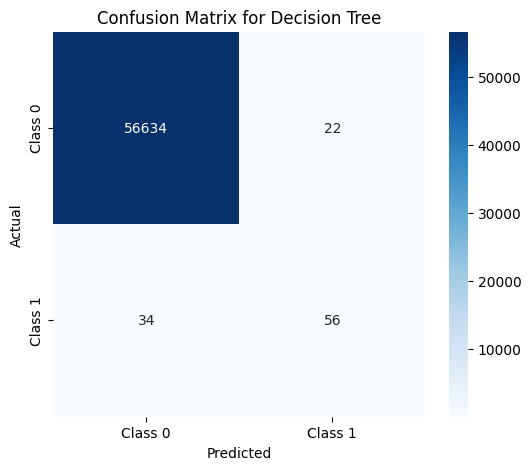

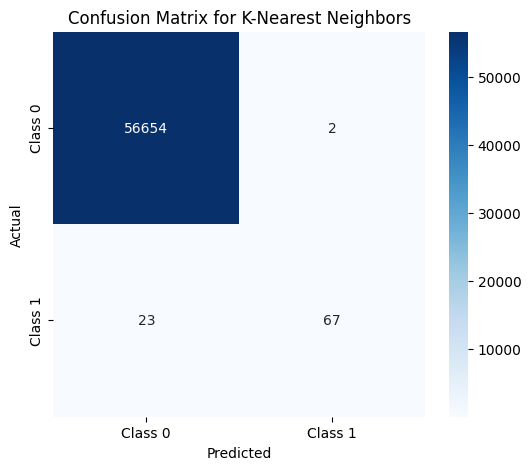

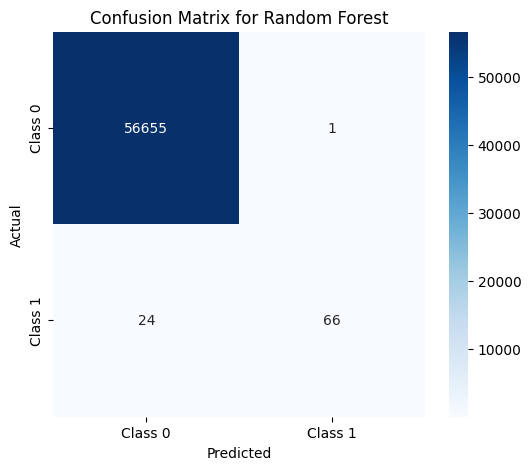

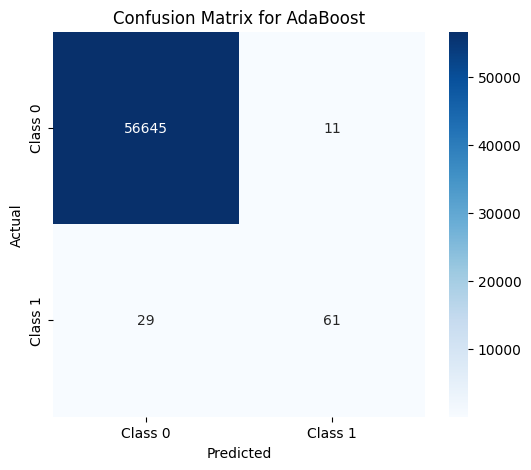

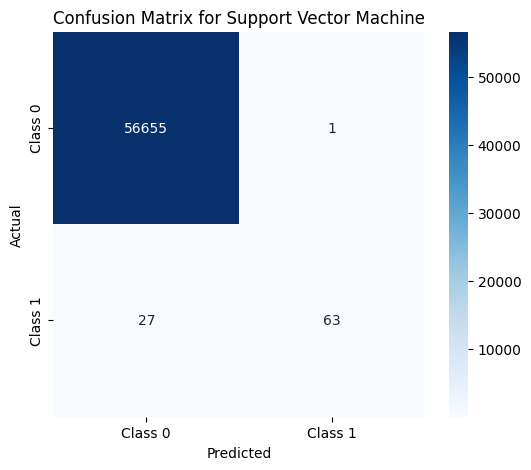

In [26]:
# Membuat daftar model yang akan digunakan
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Machine': SVC()
}

# Melatih model dan menghitung metrik evaluasi
results = {}

for model_name, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Menyimpan hasil evaluasi
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    # Menampilkan confusion matrix untuk setiap model
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Matriks Evaluasi

Evaluasi untuk Support Vector Machine:
Accuracy: 0.9995065731505305
Precision: 0.984375
Recall: 0.7
F1-Score: 0.8181818181818182
AUC: 0.947356561235056
--------------------


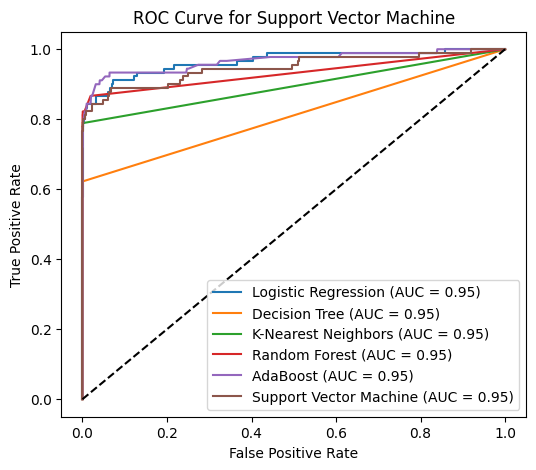

In [47]:
# Menampilkan hasil evaluasi untuk setiap model
print(f"Evaluasi untuk {model_name}:")
for metric, value in results[model_name].items():
        print(f"{metric}: {value}")
print("-" * 20)

plt.figure(figsize=(6, 5))

# Menghitung AUC dan ROC
for model_name, model in models.items():
    # SVC tidak memiliki predict_proba, maka  ditangani terpisah
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif
    else:
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Visualisasi ROC Curve
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {model_name}')
plt.legend(loc='lower right')
plt.show()

In [53]:
# Menampilkan hasil metrik evaluasi
results_df = pd.DataFrame(results).T
print("Hasil Evaluasi Metrik untuk Setiap Model:")
print(results_df)

# Menentukan model terbaik berdasarkan F1-Score
f1_scores = results_df['F1-Score']
best_f1_score = f1_scores.max()
best_model = f1_scores.idxmax()

print(f"Model terbaik berdasarkan F1-Score adalah: {best_model} dengan F1-Score: {best_f1_score}")

Hasil Evaluasi Metrik untuk Setiap Model:
                        Accuracy  Precision    Recall  F1-Score       AUC
Logistic Regression     0.999119   0.884615  0.511111  0.647887  0.965521
Decision Tree           0.999013   0.717949  0.622222  0.666667  0.810917
K-Nearest Neighbors     0.999559   0.971014  0.744444  0.842767  0.894324
Random Forest           0.999559   0.985075  0.733333  0.840764  0.931480
AdaBoost                0.999295   0.847222  0.677778  0.753086  0.966816
Support Vector Machine  0.999507   0.984375  0.700000  0.818182  0.947357
Model terbaik berdasarkan F1-Score adalah: K-Nearest Neighbors dengan F1-Score: 0.8427672955974843


Alasan mengapa F1-Score menjadi acuan dalam pemilihan model terbaik karena F1-Score merupakan nilai rata-rata harmonik (harmonic mean) antara Precision dan Recall. Nilai F1-score tinggi menunjukkan bahwa model memiliki keseimbangan yang baik antara Precision (akurasi prediksi positif) dan Recall (kemampuan mendeteksi semua kasus positif).

Maka model terbaik yang dipilih berdasarkan F1-Score yaitu

K-Nearest Neighbors dengan nilai 0.842767


# Penjelasan Setiap Model Klasifikasi

## Logistic Regression (Regresi Logistik):

- Merupakan model klasifikasi linear yang menggunakan fungsi logistik untuk memperkirakan probabilitas suatu kejadian, khususnya untuk klasifikasi biner.

- Bekerja baik pada data yang linier terpisah dan tidak memiliki terlalu banyak fitur yang sangat berkorelasi.

## Decision Tree (Pohon Keputusan):

- Model klasifikasi non-linier yang membangun struktur pohon berdasarkan aturan keputusan yang berurutan untuk memprediksi kelas dari instance data.

- Efektif untuk menangkap hubungan non-linier dalam data dan mudah diinterpretasi secara visual melalui struktur pohonnya.

## K-Nearest Neighbors (KNN):

- Model klasifikasi berdasarkan jarak yang mengklasifikasikan data berdasarkan mayoritas kelas dari "K" tetangga terdekat.

- Baik digunakan ketika data memiliki pola lokal yang jelas, tetapi memerlukan pengaturan parameter "K" yang tepat untuk hasil optimal.

## Random Forest:

- Ensemble learning berbasis pohon keputusan yang membangun banyak pohon keputusan secara acak untuk memperbaiki generalisasi dan mengurangi risiko overfitting.

- Efektif dalam menangani dataset besar dan dapat bekerja dengan fitur yang banyak serta mampu mengukur kepentingan fitur.

## AdaBoost (Adaptive Boosting):

- Teknik ensemble boosting yang secara iteratif melatih model (biasanya pohon keputusan sederhana) untuk fokus pada data yang salah diklasifikasikan sebelumnya.

- Sangat efektif untuk meningkatkan performansi model dasar yang lemah namun sensitif terhadap data yang noisy atau outlier.

## Support Vector Machine (SVM):

- Algoritma klasifikasi yang bekerja dengan menemukan hyperplane terbaik untuk memisahkan data antar kelas dengan margin terbesar.

- Khususnya efektif dalam menangani ruang fitur berdimensi tinggi, namun cenderung membutuhkan optimasi parameter kernel dan regulasi yang hati-hati.

---

# Analisa

### 1.

Penyebab utama ketidaksesuaian:

- Class imbalance: Model bisa memiliki AUC tinggi karena mampu memisahkan kelas mayoritas dengan baik, tapi presisi rendah untuk kelas minoritas.

- Threshold default (0.5): AUC mengukur performa across thresholds, sementara presisi/recall sensitif terhadap threshold klasifikasi.

Cara meningkatkan Presisi tanpa banyak mengorbankan AUC:
- Threshold tuning (gunakan precision-recall curve).
- Class weight tuning.
- Post-processing untuk memperkuat prediksi kelas positif.

Mengapa Recall penting?
- Jika False Negative berisiko besar (seperti fraud, penyakit), Recall menjadi prioritas.
- AUC-ROC bisa tetap tinggi walau Recall rendah → maka penting gunakan Precision-Recall AUC sebagai alternatif.

---
### 2.

Dampak encoding fitur high-cardinality:

- One-hot encoding menyebabkan dimensionality explosion, yang memicu:
 - Koefisien regresi menjadi tidak stabil (multikolinearitas).
 - Overfitting.

- Encoding seperti Target Encoding atau Embedding bisa jadi lebih aman, tapi:
 - Rentan terhadap data leakage (karena menggunakan target saat encoding).
 - Solusi → gunakan encoding berbasis cross-validation atau smoothing.

Trade-off:    
Stabilitas vs Informasi: Pilih encoding yang seimbang antara representasi makna dan ketahanan terhadap overfitting.

---
### 3.
SVM linea sangat bergantung pada jarak dan margin, sehingga skala fitur mempengaruhi decision boundary.

Mengapa Presisi naik tapi Recall turun?
Margin lebih tajam terhadap kelas mayoritas → model lebih percaya diri saat memprediksi positif, tapi lebih ketat terhadap minoritas → Recall turun.

Scaling Min-Max bisa buruk untuk Gradient Boosting atau Tree-based model → tidak bergantung pada skala, jadi scaling bisa mengganggu distribusi ordinal/nominal asli.

---
### 4.
Penjelasan matematis:
- Interaksi fitur menambah dimensi baru yang dapat menangkap hubungan non-linear antara fitur.
- Misal: x1 * x2 menambahkan pembeda antar kelas yang tidak bisa ditangkap oleh x1 dan x2 sendiri.

Kenapa uji chi-square gagal?

- Chi-square hanya menguji hubungan antara satu fitur dan target.
- Tidak mendeteksi interaksi antar fitur.
- Alternatif: Mutual Information (yang Anda gunakan!), SHAP, atau tree-based feature importance.

---
### 5.
Jika preprocessing dilakukan sebelum split:
- Oversampling/encoding akan “membocorkan” informasi dari test ke train.
- Validasi akan terlalu optimis (AUC val tinggi, test rendah).

Temporal split lebih baik untuk fraud detection karena:
- Transaksi terjadi berdasarkan waktu → urutan penting.
- Menghindari “future information” bocor ke masa lalu.

Stratified sampling membantu jika:
- Ingin memastikan distribusi kelas tetap seimbang dalam train/test.
   
Preprocessing yang benar:
- Split dulu → train/test.
- Fit scaler/encoder hanya di train.
- Transform test pakai parameter dari train
- Gunakan cross-validation untuk tuning hyperparameter.

